# **Import Neccessary Libraries**

In [74]:
# Data Handling and Manipulation
import pandas as pd
import numpy as np
import os
# Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Model Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Data Splitting
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data files (only need to run once)
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Part - 1: Setup and Data loading**

In [75]:
# Dataset_path from github where I have uploaded my dataset
dataset_path = 'https://media.githubusercontent.com/media/M-Talha-Farooqi/NLP-CourseWork/main/Data-Sets/Kaggle_Sentimental_Analysisi_Dataset'

In [76]:
# Join the path with the filenames so Python knows exactly where to look
train_file_path = os.path.join(dataset_path, 'train.csv')
test_file_path = os.path.join(dataset_path, 'test.csv')

In [77]:
df_train = pd.read_csv("https://media.githubusercontent.com/media/M-Talha-Farooqi/NLP-CourseWork/refs/heads/main/Data-Sets/Kaggle_Sentimental_Analysisi_Dataset/train.csv", encoding='ISO-8859-1')
df_test = pd.read_csv("https://media.githubusercontent.com/media/M-Talha-Farooqi/NLP-CourseWork/refs/heads/main/Data-Sets/Kaggle_Sentimental_Analysisi_Dataset/test.csv", encoding='ISO-8859-1')

In [78]:
df_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [79]:
df_test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [80]:
print("Shape of Training Data:", df_train.shape )
print("Shape of Testing Data:", df_test.shape )

Shape of Training Data: (27481, 10)
Shape of Testing Data: (4815, 9)


## **Part 2: Data Preprocessing**

Preprocess the text data using the following steps:

1. **Convert all text to lowercase**  
2. **Remove all non-alphanumeric characters (punctuation, numbers, etc.)**  
3. **Tokenize the text**  
4. **Remove stop words using NLTK**  
5. **Apply lemmatization using WordNetLemmatizer from NLTK**
6. **Remove the URL's**
7. **Any Possible Processing**


---

### **Step 1: Handling Missing Values**
Dropping any rows where the 'text' column is empty.

In [81]:
df_train.dropna(subset=['text'], inplace=True)
df_test.dropna(subset=['text'], inplace=True)
print(f"Train size: {len(df_train)}")
print(f"Test size: {len(df_test)}")

Train size: 27480
Test size: 3534


### **Step 2: Convert to Lowercase**

In [82]:
df_train['lowercased_text'] = df_train['text'].str.lower()
df_test['lowercased_text'] = df_test['text'].str.lower()
display(df_train[['text', 'lowercased_text']].head())

,text,lowercased_text
0,"I`d have responded, if I were going","i`d have responded, if i were going"
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego!!!
2,my boss is bullying me...,my boss is bullying me...
3,what interview! leave me alone,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t...","sons of ****, why couldn`t they put them on t..."


### **Step 3: Remove URL's**

In [83]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

df_train['no_urls_text'] = df_train['lowercased_text'].apply(remove_urls)
df_test['no_urls_text'] = df_test['lowercased_text'].apply(remove_urls)
display(df_train[['text','lowercased_text', 'no_urls_text']].head())

,text,lowercased_text,no_urls_text
0,"I`d have responded, if I were going","i`d have responded, if i were going","i`d have responded, if i were going"
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego!!!,sooo sad i will miss you here in san diego!!!
2,my boss is bullying me...,my boss is bullying me...,my boss is bullying me...
3,what interview! leave me alone,what interview! leave me alone,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t...","sons of ****, why couldn`t they put them on t...","sons of ****, why couldn`t they put them on t..."


### **Step 4: Remove Non-Alphanumeric Characters**

In [84]:
def remove_non_alpha(text):
    return re.sub(r'[^a-z\s]', '', text)

# Adding a new column for non-alphanumeric removal, based on 'no_urls_text'
df_train['clean_chars_text'] = df_train['no_urls_text'].apply(remove_non_alpha)
df_test['clean_chars_text'] = df_test['no_urls_text'].apply(remove_non_alpha)
display(df_train[['text','lowercased_text', 'no_urls_text', 'clean_chars_text']].head())

,text,lowercased_text,no_urls_text,clean_chars_text
0,"I`d have responded, if I were going","i`d have responded, if i were going","i`d have responded, if i were going",id have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego!!!,sooo sad i will miss you here in san diego!!!,sooo sad i will miss you here in san diego
2,my boss is bullying me...,my boss is bullying me...,my boss is bullying me...,my boss is bullying me
3,what interview! leave me alone,what interview! leave me alone,what interview! leave me alone,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...","sons of ****, why couldn`t they put them on t...","sons of ****, why couldn`t they put them on t...",sons of why couldnt they put them on the rel...


### **Step 5: Stop Words Removal, Lemmatization and Tokenization**

In [85]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tokens(text):
    tokens = text.split()
    # Remove stop words and lemmatize
    return " ".join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])

# Adding final preprocessed column based on 'clean_chars_text'
df_train['final_processed_text'] = df_train['clean_chars_text'].apply(clean_tokens)
df_test['final_processed_text'] = df_test['clean_chars_text'].apply(clean_tokens)

# Also set the generic 'processed_text' column for subsequent parts of the assignment
df_train['processed_text'] = df_train['final_processed_text']
df_test['processed_text'] = df_test['final_processed_text']

print("Preprocessing complete.")
display(df_train[['text','lowercased_text', 'no_urls_text','clean_chars_text', 'final_processed_text']].head())

Preprocessing complete.


,text,lowercased_text,no_urls_text,clean_chars_text,final_processed_text
0,"I`d have responded, if I were going","i`d have responded, if i were going","i`d have responded, if i were going",id have responded if i were going,id responded going
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego!!!,sooo sad i will miss you here in san diego!!!,sooo sad i will miss you here in san diego,sooo sad miss san diego
2,my boss is bullying me...,my boss is bullying me...,my boss is bullying me...,my boss is bullying me,bos bullying
3,what interview! leave me alone,what interview! leave me alone,what interview! leave me alone,what interview leave me alone,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...","sons of ****, why couldn`t they put them on t...","sons of ****, why couldn`t they put them on t...",sons of why couldnt they put them on the rel...,son couldnt put release already bought


# **Part - 3: Feature Extraction**

Extract features using two different methods:

1. **Bag of Words (Frequency Count)**  
   - Use `CountVectorizer` from `sklearn` to extract features.

2. **TF-IDF**  
   - Use `TfidfVectorizer` from `sklearn` to extract features.
     
3. **Combine Bag of Words (Frequency Count) and TF-IDF Features**


## Must SetUp the following Vectorizer Parameters

In both `CountVectorizer` and `TfidfVectorizer`, we can customize the way text data is transformed into features using various parameters. In this assignment must setup the below  given parameters with explanations:

```python
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Example with CountVectorizer
vectorizer = CountVectorizer(
    token_pattern=r'(?u)\\b\\w\\w+\\b',  # Matches words with two or more alphanumeric characters
    ngram_range=(1, 1),                  # Only includes unigrams (single words)
    analyzer='word',                     # Analyzes text by splitting into words (not characters)
    max_features=10                    # Considers only 10 unique terms 
)

# Example with TfidfVectorizer (same parameters apply)
vectorizer = TfidfVectorizer(
    token_pattern=r'(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_features=10
)```

### **Step 1: Bag of Words (CountVectorizer)**
Extracting features based on word frequency using the specified parameters.

In [86]:
# Initialize CountVectorizer with specified parameters
bow_vectorizer = CountVectorizer(
    token_pattern=r'(?u)\b\w\w+\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_features=10
)

# Fit and transform the processed text
bow_features = bow_vectorizer.fit_transform(df_train['processed_text'])

# Convert to DataFrame for visualization
df_bow = pd.DataFrame(bow_features.toarray(), columns=bow_vectorizer.get_feature_names_out())

print("Bag of Words Features (First 5 rows):")
display(df_bow.head())

Bag of Words Features (First 5 rows):


,day,dont,get,go,good,im,like,love,today,work
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


### **Step 2: TF-IDF (TfidfVectorizer)**
Extracting features using Term Frequency-Inverse Document Frequency weighting.

In [87]:
# Initialize TfidfVectorizer with specified parameters
tfidf_vectorizer = TfidfVectorizer(
    token_pattern=r'(?u)\b\w\w+\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_features=10
)

# Fit and transform the processed text
tfidf_features = tfidf_vectorizer.fit_transform(df_train['processed_text'])

# Convert to DataFrame for visualization
df_tfidf = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF Features (First 5 rows):")
display(df_tfidf.head())

TF-IDF Features (First 5 rows):


,day,dont,get,go,good,im,like,love,today,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# Combining BoW and TF-IDF DataFrames
# Since columns might overlap (top words), we add suffixes to distinguish them
df_combined_features = pd.concat([df_bow.add_suffix('_bow'), df_tfidf.add_suffix('_tfidf')], axis=1)

print("Combined Features (BoW + TF-IDF) Shape:", df_combined_features.shape)
print("Combined Features (First 5 rows):")
display(df_combined_features.head())

Combined Features (BoW + TF-IDF) Shape: (27480, 20)
Combined Features (First 5 rows):


,day_bow,dont_bow,get_bow,go_bow,good_bow,im_bow,like_bow,love_bow,today_bow,work_bow,day_tfidf,dont_tfidf,get_tfidf,go_tfidf,good_tfidf,im_tfidf,like_tfidf,love_tfidf,today_tfidf,work_tfidf
0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Part 4: Data Splitting**

Split the data into training and test sets:

1. Use `train_test_split` from `sklearn` to split the data.
2. Use 80% of the data for training and 20% for testing.

---


In [89]:
# Define Features (X) and Target (y)
# We use 'processed_text' as features and 'sentiment' as the label
X = df_train['processed_text']
y = df_train['sentiment']

# Perform the 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# After train_test_split, vectorize the data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the split results in a DataFrame for a 'bird's eye view'
split_summary = pd.DataFrame({
    'Dataset Part': ['Training Set', 'Testing Set'],
    'Number of Samples': [len(X_train), len(X_test)],
    'Percentage (%)': [(len(X_train)/len(X)*100), (len(X_test)/len(X)*100)]
})

print("Data Splitting Summary:")
display(split_summary)

print("\nFirst 5 rows of Training Features (X_train):")
display(X_train.to_frame().head())

print("\nFirst 5 rows of Training Labels (y_train):")
display(y_train.to_frame().head())


Data Splitting Summary:


,Dataset Part,Number of Samples,Percentage (%)
0,Training Set,21984,80.0
1,Testing Set,5496,20.0



First 5 rows of Training Features (X_train):


,processed_text
21209,oh he hilarious im commenting fact he much
18265,thanks trying hoping bud trillin fest would ho...
9684,show house rocked saying goodbye soon
9689,west coast timegettin ready catch flight back ...
22728,computer slooowww morning think sign go home p...



First 5 rows of Training Labels (y_train):


,sentiment
21209,positive
18265,positive
9684,neutral
9689,positive
22728,neutral


## **Part 5: Model Training**

Train three different machine learning models:

1. **Random Forest**  
2. **Support Vector Machine (SVM)**  
3. **Naive Bayes**  


### **Model 1: Random Forest**
Initializing and training a Random Forest Classifier on the combined feature set.

In [90]:

    # Initialize and Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
print("Random Forest model trained successfully.")

Random Forest model trained successfully.


### **Model 2: Support Vector Machine (SVM)**
Initializing and training an SVM Classifier.

In [91]:
# Initialize and Train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
print("SVM model trained successfully.")

SVM model trained successfully.


### **Model 3: Naive Bayes**
Initializing and training a Multinomial Naive Bayes Classifier.

In [92]:
# Initialize and Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
print("Naive Bayes model trained successfully.")

Naive Bayes model trained successfully.


## **Part 6: Evaluation**

Evaluate each model on the test data:

1. Calculate and print the following metrics:
   - **Accuracy**
   - **Precision**
   - **Recall**
   - **F1-score**
   - **Confusion Matrix**
   - **Classification Report**


---


In [93]:
from sklearn.metrics import confusion_matrix

# Dictionary to store results
results = {}

def evaluate_model(model, name, X_test, y_test):
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }
    
    # Print details
    print(f"--- {name} Evaluation ---")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    display(pd.DataFrame(cm, columns=np.unique(y_test), index=np.unique(y_test)))
    print("\n" + "="*40 + "\n")

# Evaluate each model
evaluate_model(rf_model, "Random Forest", X_test_tfidf, y_test)
evaluate_model(svm_model, "SVM", X_test_tfidf, y_test)
evaluate_model(nb_model, "Naive Bayes", X_test_tfidf, y_test)

# Convert results to a DataFrame for a bird's eye view
df_results = pd.DataFrame(results).T

print("Model Performance Summary:")
display(df_results)

--- Random Forest Evaluation ---

Classification Report:
              precision    recall  f1-score   support

    negative       0.45      0.15      0.22      1572
     neutral       0.45      0.83      0.58      2236
    positive       0.64      0.33      0.44      1688

    accuracy                           0.48      5496
   macro avg       0.51      0.43      0.41      5496
weighted avg       0.51      0.48      0.43      5496

Confusion Matrix:


,negative,neutral,positive
negative,233,1223,116
neutral,194,1846,196
positive,96,1033,559




--- SVM Evaluation ---

Classification Report:
              precision    recall  f1-score   support

    negative       0.45      0.13      0.20      1572
     neutral       0.45      0.83      0.58      2236
    positive       0.62      0.34      0.44      1688

    accuracy                           0.48      5496
   macro avg       0.51      0.43      0.41      5496
weighted avg       0.50      0.48      0.43      5496

Confusion Matrix:


,negative,neutral,positive
negative,206,1238,128
neutral,169,1848,219
positive,84,1030,574




--- Naive Bayes Evaluation ---

Classification Report:
              precision    recall  f1-score   support

    negative       0.36      0.01      0.01      1572
     neutral       0.44      0.92      0.59      2236
    positive       0.67      0.31      0.43      1688

    accuracy                           0.47      5496
   macro avg       0.49      0.41      0.34      5496
weighted avg       0.49      0.47      0.38      5496

Confusion Matrix:


,negative,neutral,positive
negative,10,1473,89
neutral,10,2054,172
positive,8,1152,528




Model Performance Summary:


,Accuracy,Precision,Recall,F1-score
Random Forest,0.479985,0.507630,0.479985,0.434797
SVM,0.478166,0.502448,0.478166,0.429891
Naive Bayes,0.471616,0.486282,0.471616,0.376205


## **Part 7: Comparative Analysis**

Create a comparison graph of the model performance metrics:

1. Plot a bar graph comparing the **Accuracy**, **Precision**, **Recall**, and **F1-score** for each model.
2. Use `matplotlib` or `seaborn` for plotting.

---

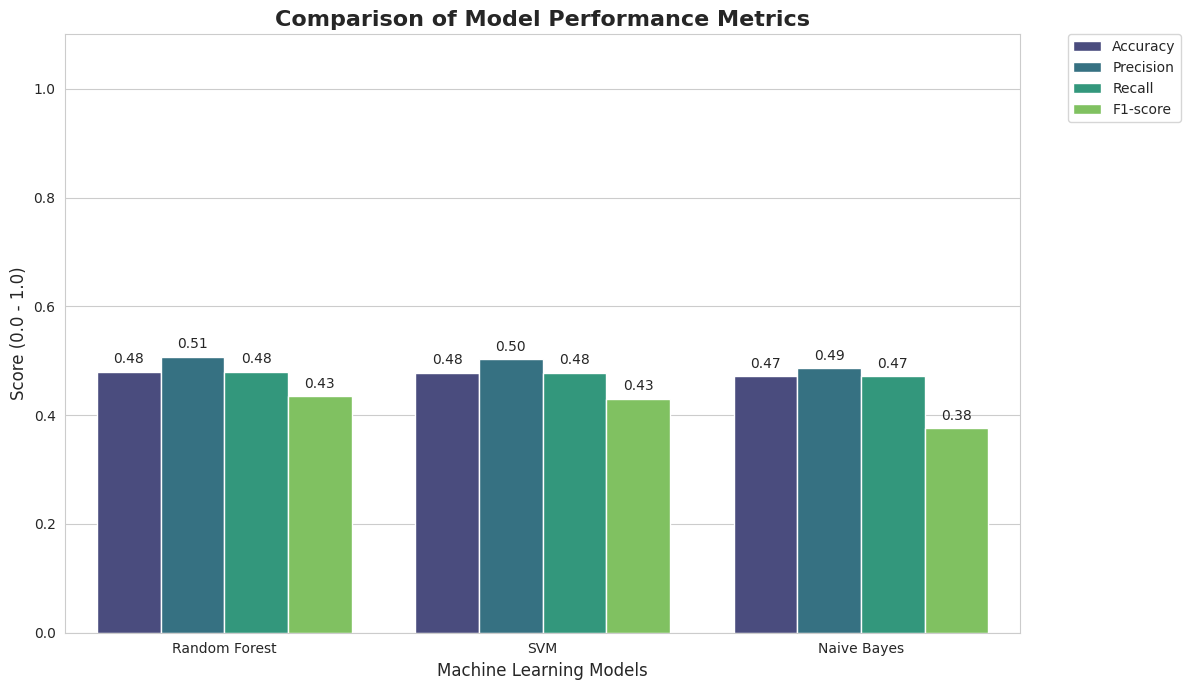

In [94]:
# Plotting the comparison graph
plt.figure(figsize=(12, 7))

# Melt the dataframe to make it suitable for seaborn barplot
df_melted = df_results.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
df_melted.columns = ['Model', 'Metric', 'Score']

# Create bar graph
sns.set_style("whitegrid")
barplot = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='viridis')

# Adding labels and title
plt.title('Comparison of Model Performance Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score (0.0 - 1.0)', fontsize=12)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylim(0, 1.1)  # Set limit slightly above 1 for legend room

# Add values on top of bars
for p in barplot.patches:
    if p.get_height() > 0: # Avoid labels for empty patches
        barplot.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points', 
                       fontsize=10)

plt.tight_layout()
plt.show()